In [4]:
import pandas as pd
import numpy as np
from numpy import ma
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('ticks')
mpl.rc('mathtext', rm='serif', fontset='cm')
mpl.rc('font', family='serif', serif='Times New Roman')
labelfont = {'fontsize':9, 'fontname':'Times New Roman'}
tickfont = {'fontsize':8, 'fontname':'Times New Roman'}

## Samara Plots Notebook

I just wanted to pull together some quick plots of the data into one place, so I'll do so inline here.

First, I'll write down where the data is in this repository for my benefit.

### Directory layout (data locations)

* Density Study
    * Samara Segment Mass.xlsx
* DropStudy
    * OutdoorDropData
        * rawdataworkspace.mat
        * 2017-04 Samara Drop Tests.xlsx
        * weatherData.xlsx
    * VideoScripts
        * NorwayMapleData.csv
        * RealMapleData.csv
        * SilverMapleData.csv
        
### Load data:

In [5]:
real_vel = pd.read_csv('DropStudy/VideoScripts/RealMapleData.csv',header=0,names=['trial','cutoff','velocity','rotation'])
norway_vel = pd.read_csv('DropStudy/VideoScripts/NorwayMapleData.csv',header=0,names=['trial','cutoff','velocity','rotation'])
silver_vel = pd.read_csv('DropStudy/VideoScripts/SilverMapleData.csv',header=0,names=['trial','cutoff','velocity','rotation'])


3D-printed Norway maples 
Mean (Vel):  1.279524845485293 
 Std (Vel):  0.17478266113801189 
Mean (Rot):  93.74803521152486 
 Std (Rot):  14.388116809684405 


3D-printed Silver maples 
Mean (Vel):  1.3566773432394428 
 Std (Vel):  0.2209843794662776 
Mean (Rot):  138.6216121106958 
 Std (Rot):  17.652837321072465 


Real Norway maples 
Mean (Vel):  1.1009432031192208 
 Std (Vel):  0.24413162070134042 
Mean (Rot):  81.4330385559582 
 Std (Rot):  27.618969893536043 




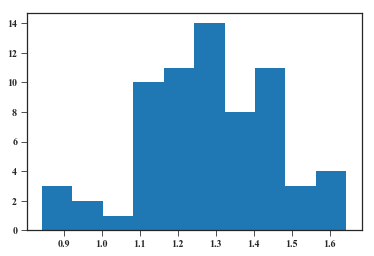

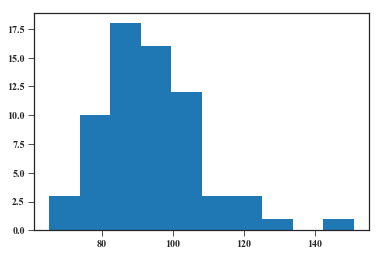

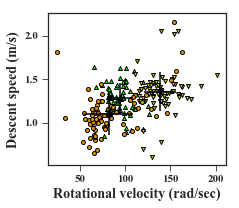

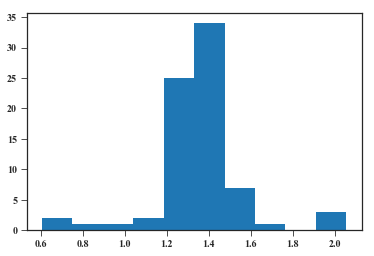

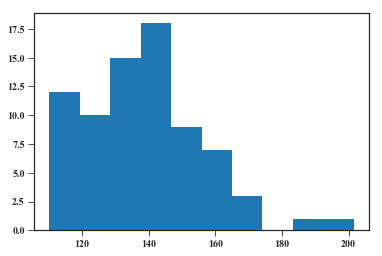

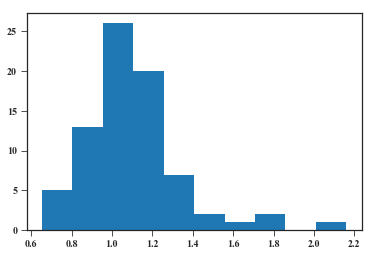

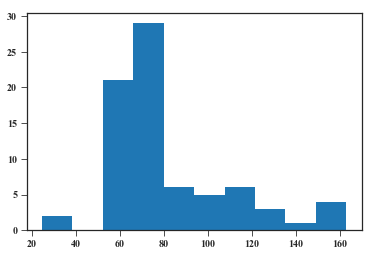

In [67]:
vels = list(norway_vel['velocity'].values)
angs =list(norway_vel['rotation'].values)
Nvelocities = []; 
Nrotation  = []; 
for val in zip(vels,angs):
    if not ' ' in val:
        Nvelocities.append(float(val[0]))
        Nrotation.append(float(val[1]))

print('3D-printed Norway maples \nMean (Vel): ',np.mean(Nvelocities),'\n','Std (Vel): ',np.std(Nvelocities),'\n''Mean (Rot): ',np.mean(Nrotation),'\n','Std (Rot): ',np.std(Nrotation),'\n\n')
plt.figure()
plt.hist(Nvelocities)
plt.figure()
plt.hist(Nrotation)
plt.figure(3, figsize=(3.2,2.8))
plt.scatter(Nrotation,Nvelocities, marker='^', edgecolors='k', s=16, c=np.array([[0,1,0]]))
plt.errorbar(np.mean(Nrotation), np.mean(Nvelocities), xerr=np.std(Nrotation), yerr=np.std(Nvelocities), fmt='^', color='black', ms=6)

vels =list(silver_vel['velocity'].values)
angs =list(silver_vel['rotation'].values)
Svelocities  = []; 
Srotation = []; 
for val in zip(vels,angs):
    if not ' ' in val:
        Svelocities.append(float(val[0]))
        Srotation.append(float(val[1]))

print('3D-printed Silver maples \nMean (Vel): ',np.mean(Svelocities),'\n','Std (Vel): ',np.std(Svelocities),'\n''Mean (Rot): ',np.mean(Srotation),'\n','Std (Rot): ',np.std(Srotation),'\n\n')

plt.figure()
plt.hist(Svelocities)
plt.figure()
plt.hist(Srotation)
plt.figure(3)
plt.scatter(Srotation,Svelocities, marker = 'v', edgecolors='k', s=16, c=np.array([[0.8,0.8,0]]))
plt.errorbar(np.mean(Srotation), np.mean(Svelocities), xerr=np.std(Srotation), yerr=np.std(Svelocities), fmt='v', color='black', ms=6)

vels =list(real_vel['velocity'].values)
angs =list(real_vel['rotation'].values)
Rvelocities  = []; 
Rrotation  = []; 
for val in zip(vels,angs):
    if not ' ' in val:
        Rvelocities.append(float(val[0]))
        Rrotation.append(float(val[1]))

print('Real Norway maples \nMean (Vel): ',np.mean(Rvelocities),'\n','Std (Vel): ',np.std(Rvelocities),'\n''Mean (Rot): ',np.mean(Rrotation),'\n','Std (Rot): ',np.std(Rrotation),'\n\n')

plt.figure()
plt.hist(Rvelocities)
plt.figure()
plt.hist(Rrotation)
plt.figure(3)
plt.scatter(Rrotation,Rvelocities, edgecolors='k', s=16, c=0.9*np.array([[1,165/255,0]]))
plt.errorbar(np.mean(Rrotation), np.mean(Rvelocities), xerr=np.std(Rrotation), yerr=np.std(Rvelocities), fmt='o', color='black', ms=6)
plt.xlabel('Rotational velocity (rad/sec)', fontsize=14)
plt.ylabel('Descent speed (m/s)', fontsize=14)
plt.gca().tick_params(labelsize=11)
plt.savefig('Figures/IndoorDropData.png', dpi=450, bbox_inches='tight', transparent=True)
plt.savefig('Figures/IndoorDropData.eps', bbox_inches='tight', transparent=True)
plt.show()


Text(0.5,1,'Standard Deviation for Linear Density Fit')

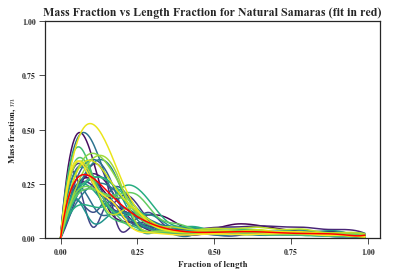

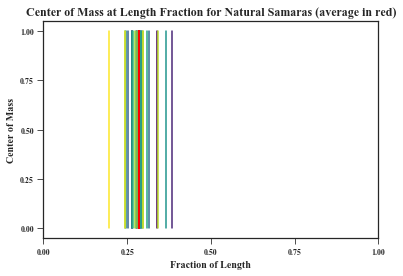

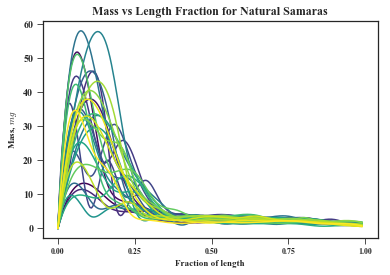

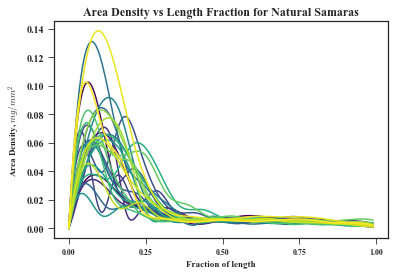

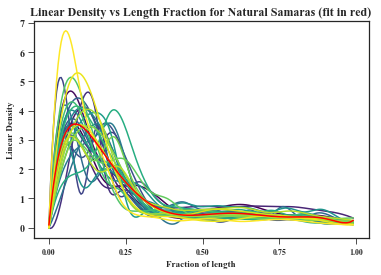

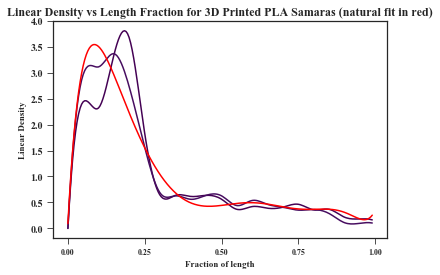

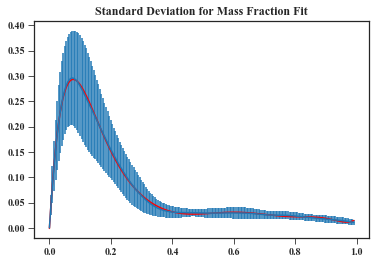

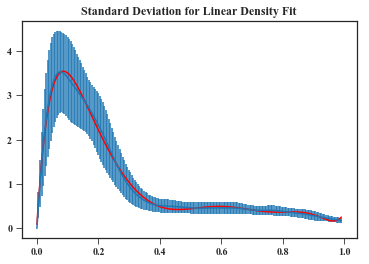

In [4]:
df = pd.read_excel('Density Study/Samara Segment Mass.xlsx', sheet_name='Sheet1')
data_list = df.values.tolist()

#Initialize variables and arrays
mass_length = matrix = np.zeros((30,21))
mass = matrix = np.zeros((30,21))
length = matrix = np.zeros((30,21))
area = matrix = np.zeros((30,1))
center_mass = matrix = np.zeros((30,1))
center_percent = matrix = np.zeros((30,1))
total_data = matrix = np.zeros((30,200))
total_data2 = matrix = np.zeros((30,200))
total_data3 = matrix = np.zeros((30,200))
total_data4 = matrix = np.zeros((30,200))
total_data5 = matrix = np.zeros((2,200))
area2 = matrix = np.zeros((30,1))
colors = [mpl.cm.viridis(a) for a in np.linspace(0, 1, 30)]
mass2 = matrix = np.zeros((2,21))
length2 = matrix = np.zeros((2,21))
mass_length2 = matrix = np.zeros((2,21))
center_mass2 = matrix = np.zeros((2,1))
center_percent2 = matrix = np.zeros((2,1))
center_percent2 = matrix = np.zeros((2,1))

#Plot mass fraction vs length fraction
for a in range(0,30):
    mass[a, 1:] = data_list[a+2][1:21]
    length[a, 1:] = data_list[a+34][1:21]
    mass_length[a] = [b*c for b,c in zip(mass[a],np.cumsum(length[a]))]
    center_mass[a] = np.nansum(mass_length[a])/np.nansum(mass[a])
    center_percent[a] = center_mass[a]/np.nansum(length[a])
    X = ma.masked_invalid(length[a])
    Y = ma.masked_invalid(mass[a])
    f = interp1d(np.cumsum(X[~X.mask])/np.sum(X[~X.mask]), (Y[~X.mask])/np.sum(Y[~X.mask]), kind='cubic')
    total_data[a] = f(np.linspace(0,.99,200))
    plt.figure(1)
    plt.title("Mass Fraction vs Length Fraction for Natural Samaras (fit in red)")
#    plt.plot(np.linspace(0, 0.99, 200), f(np.linspace(0, 0.99, 200)))
    plt.xlabel('Fraction of length', **labelfont)
    plt.ylabel('Mass fraction, $m$', **labelfont)
    plt.xticks([0, 0.25, 0.5, 0.75, 1.0], **tickfont)
    plt.yticks([0, 0.25, 0.5, 0.75, 1.0], **tickfont)
    plt.ylim([0, 1])
    plt.plot(np.linspace(0, 0.99, 200), f(np.linspace(0, 0.99, 200)), color=colors[a])

for a, c in enumerate(center_percent):
    plt.figure(2)
    plt.title("Center of Mass at Length Fraction for Natural Samaras (average in red)")
    plt.xlabel("Fraction of Length")
    plt.ylabel("Center of Mass")
    plt.xlim([0,1])
    plt.xticks([0, 0.25, 0.5, 0.75, 1.0], **tickfont)
    plt.yticks([0, 0.25, 0.5, 0.75, 1.0], **tickfont)
    plt.plot([c, c], [0, 1], color=colors[a])
    plt.plot([np.mean(center_percent),np.mean(center_percent)],[0,1], color='r')
  


#Plot mass vs length fraction
for a in range(0,30):
    mass[a, 1:] = data_list[a+2][1:21]
    length[a, 1:] = data_list[a+34][1:21]
    mass_length[a] = [b*c for b,c in zip(mass[a],np.cumsum(length[a]))]
    center_mass[a] = np.nansum(mass_length[a])/np.nansum(mass[a])
    center_percent[a] = center_mass[a]/np.nansum(length[a])
    X = ma.masked_invalid(length[a])
    Y = ma.masked_invalid(mass[a])
    g = interp1d(np.cumsum(X[~X.mask])/np.sum(X[~X.mask]), (Y[~X.mask]), kind='cubic')
    total_data2[a] = g(np.linspace(0,.99,200))
    plt.figure(3)
    plt.title("Mass vs Length Fraction for Natural Samaras")
    plt.plot(np.linspace(0, 0.99, 200), g(np.linspace(0, 0.99, 200)), color=colors[a])
    plt.xlabel('Fraction of length', **labelfont)
    plt.ylabel('Mass, $mg$', **labelfont)
    plt.xticks([0, 0.25, 0.5, 0.75, 1.0], **tickfont)


#Plot Density vs length fraction
for a in range(0,30):
    mass[a, 1:] = data_list[a+2][1:21]
    length[a, 1:] = data_list[a+34][1:21]
    area[a] = data_list[a+66][1]
    mass_length[a] = [b*c for b,c in zip(mass[a],np.cumsum(length[a]))]
    center_mass[a] = np.nansum(mass_length[a])/np.nansum(mass[a])
    center_percent[a] = center_mass[a]/np.nansum(length[a])
    X = ma.masked_invalid(length[a])
    Y = ma.masked_invalid(mass[a])
#    Z = ma.masked_invalid(area[a])
    h = interp1d(np.cumsum(X[~X.mask])/np.sum(X[~X.mask]), (Y[~X.mask])/(area[a]), kind='cubic')
    total_data3[a] = h(np.linspace(0,.99,200))
    plt.figure(4)
    plt.title("Area Density vs Length Fraction for Natural Samaras")
    plt.plot(np.linspace(0, 0.99, 200), h(np.linspace(0, 0.99, 200)), color=colors[a])
    plt.xlabel('Fraction of length', **labelfont)
    plt.ylabel('Area Density, $mg/mm^2$', **labelfont)
    plt.xticks([0, 0.25, 0.5, 0.75, 1.0], **tickfont)



#Plot linear density vs length fraction
for a in range(0,30):
    mass[a, 1:] = data_list[a+2][1:21]
    length[a, 1:] = data_list[a+34][1:21]
    mass_length[a] = [b*c for b,c in zip(mass[a],np.cumsum(length[a]))]
    center_mass[a] = np.nansum(mass_length[a])/np.nansum(mass[a])
    center_percent[a] = center_mass[a]/np.nansum(length[a])
    X = ma.masked_invalid(length[a])
    Y = ma.masked_invalid(mass[a])
    j = interp1d(np.cumsum(X[~X.mask])/np.sum(X[~X.mask]), ((Y[~X.mask])/(X[~X.mask]))*np.sum(X[~X.mask])/np.sum(Y[~X.mask]), kind='cubic')
    total_data4[a] = j(np.linspace(0,.99,200))
    plt.figure(5)
    plt.title("Linear Density vs Length Fraction for Natural Samaras (fit in red)")
    plt.plot(np.linspace(0, 0.99, 200), j(np.linspace(0, 0.99, 200)), color=colors[a])
    plt.xlabel('Fraction of length', **labelfont)
    plt.ylabel('Linear Density', **labelfont)
    plt.xticks([0, 0.25, 0.5, 0.75, 1.0], **tickfont)
    area2[a] = np.sum((((Y[~X.mask])/(X[~X.mask]))*np.sum(X[~X.mask])/np.sum(Y[~X.mask]))*((X[~X.mask])/np.sum(X[~X.mask])))



for a in range(0,2):
    mass2[a, 1:] = data_list[a+98][1:21]
    length2[a, 1:] = data_list[a+101][1:21]
    mass_length2[a] = [b*c for b,c in zip(mass2[a],np.cumsum(length2[a]))]
    center_mass2[a] = np.nansum(mass_length2[a])/np.nansum(mass2[a])
    center_percent2[a] = center_mass2[a]/np.nansum(length2[a])
    X2 = ma.masked_invalid(length2[a])
    Y2 = ma.masked_invalid(mass2[a])
    w = interp1d(np.cumsum(X2[~X2.mask])/np.sum(X2[~X2.mask]), ((Y2[~X2.mask])/(X2[~X2.mask]))*np.sum(X2[~X2.mask])/np.sum(Y2[~X2.mask]), kind='cubic')
    total_data5[a] = w(np.linspace(0,.99,200))
    plt.figure(6)
    plt.title("Linear Density vs Length Fraction for 3D Printed PLA Samaras (natural fit in red)")
    plt.plot(np.linspace(0, 0.99, 200), w(np.linspace(0, 0.99, 200)), color=colors[a])
    plt.xlabel('Fraction of length', **labelfont)
    plt.ylabel('Linear Density', **labelfont)
    plt.xticks([0, 0.25, 0.5, 0.75, 1.0], **tickfont)
    area2[a] = np.sum((((Y[~X.mask])/(X[~X.mask]))*np.sum(X[~X.mask])/np.sum(Y[~X.mask]))*((X[~X.mask])/np.sum(X[~X.mask])))
        
        

        
# Find best fit line for mass fraction vs length fraction
#area = np.trapz(total_data[5],dx=.1)
xdata = np.linspace(0,.99,200)
mean_data = [np.mean(total_data[:, k]) for k in range(len(xdata))]
mean_data2 = [np.mean(total_data4[:, k]) for k in range(len(xdata))]
std_data = [np.std(total_data[:, k]) for k in range(len(xdata))]
std_data2 = [np.std(total_data4[:, k]) for k in range(len(xdata))]
#xdata = np.vstack([xdata[1:199:1] for k in range(30)]).ravel()
xdata = np.vstack([xdata for k in range(30)]).ravel()
#remove 0 entry from array
#total_data = total_data[:,1:199:1].ravel()
total_data = total_data.ravel()
total_data4 = total_data4.ravel()

#fit data
z = np.polyfit(xdata,total_data,9)
z2 = np.polyfit(xdata,total_data4,9)

xdata = np.linspace(0,.99,200)
y = np.poly1d(z)
y2 = np.poly1d(z2)
plt.figure(1)
plt.plot(xdata, y(xdata), color='r')
plt.figure(5)
plt.plot(xdata, y2(xdata),color='r')
plt.figure(6)
plt.plot(xdata, y2(xdata),color='r')

plt.figure()
ax = plt.gca()
ax.errorbar(xdata, mean_data, yerr=std_data)
ax.plot(xdata,y(xdata), color='r')
plt.title("Standard Deviation for Mass Fraction Fit")

plt.figure()
ax = plt.gca()
ax.errorbar(xdata, mean_data2, yerr=std_data2)
ax.plot(xdata,y2(xdata), color='r')
plt.title("Standard Deviation for Linear Density Fit")




In [77]:
import pandas as pd
import numpy as np

raw_od_data = pd.read_excel('DropStudy/OutdoorDropData/2017-04 Samara Drop Tests.xlsx', header=1, usecols=[a for a in range(13)])

new_df = pd.DataFrame(columns=['SamaraType', 'Group', 'Trial', 'Time', 'Dist', 'Ang'])

samara_list = ['SM', 'NM', 'N']
prop_list = ['Time', 'Dist', 'Ang']

checked_list = []

for index, row in data.iterrows():
#   print(row)
    for samara_type in samara_list:
        group = row['Drop']
        for trial in range(1,4):
            if (samara_type, group, trial) not in checked_list:
                checked_list.append((samara_type, group, trial))
                break
        row_dict = {'SamaraType': samara_type, 'Group': row['Drop'], 'Trial': trial}
        for prop in prop_list:
            value = row[prop + ' - ' + samara_type]
            if not value == '-' and ~np.isnan(value):
                row_dict[prop] = value
        if len(row_dict) > 3:
            new_df = new_df.append(pd.Series(row_dict), ignore_index=True)
        else:
            checked_list = checked_list[:-1]
#         new_df.append(pd.DataFrame(row_dict), ignore_index=True)
    #         print(index, prop, samara_type, val)
new_df['Velocity'] = 10*0.3048/new_df['Time']

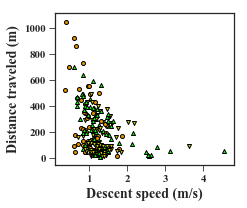

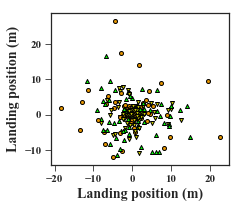

In [74]:
fig1, ax1 = plt.subplots(figsize=(3.2,2.8))
fig2, ax2 = plt.subplots(figsize=(3.2,2.8))

for row in new_df.itertuples():
    if ~np.isnan(row.Velocity):
        if row.SamaraType == 'N':
            color = 0.9*np.array([[1,165/255,0]])
            marker = 'o'
        elif row.SamaraType == 'NM':
            color = np.array([[0,1,0]])
            marker = '^'
        else:
            color = np.array([[0.8,0.8,0]])
            marker = 'v'
        ax1.scatter(row.Velocity, row.Dist, edgecolors='k', s=16, marker=marker, c=color)
        ax2.scatter(row.Dist*np.cos(row.Ang)*0.0254, row.Dist*np.sin(row.Ang)*0.0254, marker=marker, edgecolors='k', s=16, c=color)
plt.sca(ax1)
plt.xlabel('Descent speed (m/s)', fontsize=14)
plt.ylabel('Distance traveled (m)', fontsize=14)
ax1.tick_params(labelsize=11)
plt.savefig('Figures/OutdoorSpeedDist.png', dpi=450, bbox_inches='tight', transparent=True)
plt.savefig('Figures/OutdoorSpeedDist.eps', bbox_inches='tight', transparent=True)
plt.sca(ax2)
plt.xlabel('Landing position (m)', fontsize=14)
plt.ylabel('Landing position (m)', fontsize=14)
ax2.tick_params(labelsize=11)
plt.savefig('Figures/OutdoorScatter.png', dpi=450, bbox_inches='tight', transparent=True)
plt.savefig('Figures/OutdoorScatter.eps', bbox_inches='tight', transparent=True)
plt.show()

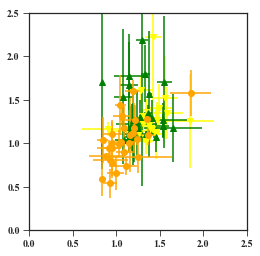

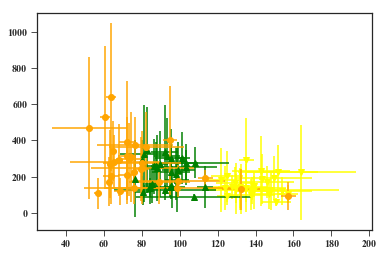

In [114]:
collected_data = pd.DataFrame(columns=['SamaraType','Group',
                                       'ODspeedMean','ODspeedStd','ODdistMean','ODdistStd',
                                       'IDspeedMean','IDspeedStd','IDrotMean','IDrotStd'])

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

for samType in ['SM', 'NM', 'N']:
    if samType=='SM':
        marker = 'v'
        color = 'yellow'
        prefix = 's'
        IDdata = silver_vel.copy(deep=False)
    elif samType=='NM':
        marker = '^'
        color = 'green'
        prefix = 'n'
        IDdata = norway_vel.copy(deep=False)
    else:
        marker = 'o'
        color = 'orange'
        prefix = 'r'
        IDdata = real_vel.copy(deep=False)
    ODdata = new_df[new_df['SamaraType']==samType]
    for group in range(1,31):
        ODgroupData = ODdata[ODdata['Group']==group]
        temp_row = {'SamaraType':prefix,'Group':group}
        ODspeeds = []
        ODdist = []
        IDspeeds = []
        IDrotation = []
        for row in ODgroupData.itertuples():
            trial = row.Trial
            ODspeeds.append(row.Velocity)
            ODdist.append(row.Dist)
        for trial in range(1,4):
            key = '{:s}-g{:02d}-t{:02d}-data.csv'.format(prefix,group,trial)
            if len(IDdata[IDdata['trial']==key])> 0:
                if not IDdata[IDdata['trial']==key]['velocity'].values[0]==' ':
                    IDspeeds.append(float(IDdata[IDdata['trial']==key]['velocity'].values[0]))
                if not IDdata[IDdata['trial']==key]['rotation'].values[0]==' ':
                    IDrotation.append(float(IDdata[IDdata['trial']==key]['rotation'].values[0]))
        if len(ODspeeds)>0:
            temp_row['ODspeedMean'] = np.mean(ODspeeds)
            temp_row['ODspeedStd'] = np.std(ODspeeds)
            temp_row['ODdistMean'] = np.mean(ODdist)
            temp_row['ODdistStd'] = np.std(ODdist)
        else:
            temp_row['ODspeedMean'] = np.nan
            temp_row['ODspeedStd'] = np.nan
            temp_row['ODdistMean'] = np.nan
            temp_row['ODdistStd'] = np.nan
        if len(IDspeeds)>0:
            temp_row['IDspeedMean'] = np.mean(IDspeeds)
            temp_row['IDspeedStd'] = np.std(IDspeeds)
            temp_row['IDrotMean'] = np.mean(IDrotation)
            temp_row['IDrotStd'] = np.std(IDrotation)
        else:
            temp_row['IDspeedMean'] = np.nan
            temp_row['IDspeedStd'] = np.nan
            temp_row['IDrotMean'] = np.nan
            temp_row['IDrotStd'] = np.nan
        collected_data = collected_data.append(pd.Series(temp_row), ignore_index=True)
        
        ax1.errorbar(temp_row['IDspeedMean'], temp_row['ODspeedMean'], 
                     xerr=temp_row['IDspeedStd'], yerr=temp_row['ODspeedStd'], 
                     marker=marker, color=color)
        
        ax2.errorbar(temp_row['IDrotMean'], temp_row['ODdistMean'], 
                     xerr=temp_row['IDrotStd'], yerr=temp_row['ODdistStd'], 
                     marker=marker, color=color)

ax1.set_aspect('equal')
plt.sca(ax1)
plt.xlim([0,2.5])
plt.ylim([0,2.5])
plt.show()

In [113]:
collected_data

,SamaraType,Group,ODspeedMean,ODspeedStd,ODdistMean,ODdistStd,IDspeedMean,IDspeedStd,IDrotMean,IDrotStd
0,s,1,NaN,NaN,166.625000,84.555147,1.035256,0.334323,129.213562,9.927797
1,s,2,NaN,NaN,146.708333,57.368902,2.055407,0.000000,139.243845,0.000000
2,s,3,1.282989,0.072183,192.500000,121.924199,1.289868,0.030712,149.544584,20.012244
3,s,4,1.615087,0.164213,125.000000,103.786038,1.287780,0.147998,139.399492,12.349677
4,s,5,1.059416,0.050101,232.166667,192.546648,1.329249,0.011973,142.978125,15.231636
5,s,6,1.216707,0.179630,187.583333,137.547353,1.303390,0.127233,143.185879,1.285060
6,s,7,NaN,NaN,131.458333,113.678748,1.267782,0.093441,131.607774,0.519029
7,s,8,1.120306,0.065016,134.541667,140.742130,1.265394,0.032041,129.588769,7.630024
8,s,9,1.214099,0.183126,139.041667,110.212736,1.377867,0.055942,132.064545,16.890591
9,s,10,1.316722,0.081243,100.333333,85.413963,1.297131,0.028977,137.449696,12.926516


In [105]:
norway_vel[norway_vel['trial']=='n-g01-t01-data.csv']

,trial,cutoff,velocity,rotation
0,n-g01-t01-data.csv,1877,1.1661784634163914,109.98531297811847
